In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

###  TB-model for Bethe lattice with infinite number of neighbours

In [2]:
from tight_binding import Bethe_lattice as BL

In [3]:
omega = np.linspace(-4,4,1000)
BandWidth = 2.0
bethe = BL(BandWidth, omega)

/home/alexloner/Documents/GitHub_repos/HH_DMFT/hh_dmft/tight_binding.py:144: RuntimeWarning: invalid value encountered in sqrt
  self.dos = np.sqrt(4 * self.t ** 2 - w ** 2) / np.pi / 2 / self.t ** 2


Text(0.5, 1.0, 'Density of states')

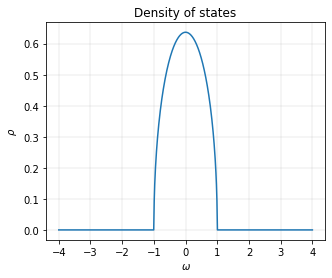

In [4]:
plt.figure(figsize=(5, 4))
plt.grid('-.', lw=0.25)
plt.plot(omega, bethe.dos)
plt.ylabel(r'$\rho$')
plt.xlabel(r'$\omega$')
plt.title('Density of states')

### DMFT for Hubbard model
#### Green function in Matsubara frequencies

In [5]:
beta = 40.0
num_iw = 128 #
wn = np.pi * (2 * np.array(range(-int(num_iw / 2), num_iw // 2)) + 1) / beta
U = 2.5 
mu = 0.0
g0_initial = bethe.gf_iwn(wn, mu)

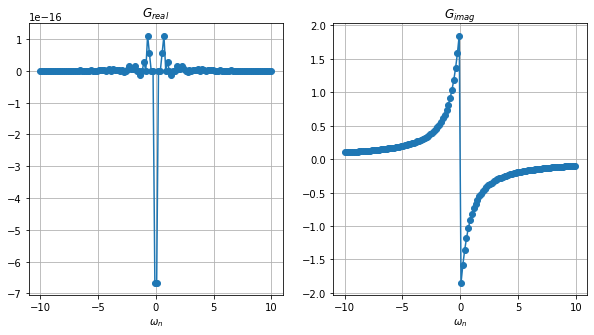

In [6]:
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.plot(wn, g0_initial.real, '-o')
plt.grid()
plt.xlabel(r'$\omega_{n}$')
plt.title(r'$G_{real}$')
plt.subplot(122)
plt.plot(wn, g0_initial.imag, '-o')
plt.xlabel(r'$\omega_{n}$')
plt.title(r'$G_{imag}$')
plt.grid()

#### CT_INT solver 

In [7]:
from solvers.qmc import QMC_CT_INT

In [8]:
alpha = 1.0 #
n_loops = 15 # number of DMFT-loops
tol = 0.0001 # convergence accuracy
num = 10 # number of initial vertexes
steps = 1 * 10 ** 5 # number of MC iteraction
p = 1.0 #
delta = 0.51 # 
y = 0.4321 # el-ph coupling constant
w0 = 0.07# phonon frequency
pu = 1.0 # probability of hubbard vertex

In [27]:
solver = QMC_CT_INT(beta=beta, U = U, num=num , g0=g0_initial, num_iw=num_iw, steps= steps,
                            p=p, delta=delta, y = y, w0 = w0, pu=pu,
                           mu=mu)

In [13]:
from dmft import DMFT

In [16]:
dmft_qmc = DMFT(n_loops, g0_initial, solver, alpha, tol, tb_model=bethe)

In [17]:
dmft_qmc.body()

DMFT Loop : 0 / 15 starts at 2021-10-16 14:37:18.805269
DMFT Loop : 1 / 15 starts at 2021-10-16 14:38:12.167235


Simulation:   0%|          | 0/100000 [00:00<?, ?it/s]/home/alexloner/Documents/GitHub_repos/HH_DMFT/hh_dmft/utils/qmc_tools.py:98: NumbaPerformanceWarning: np.dot() is faster on contiguous arrays, called on (array(float64, 1d, A), array(float64, 1d, C))
  GFu[k,num] = sign_m * comp_gf_iw(num, mg0, times0, freq, g_iw)
Simulation:   8%|▊         | 7587/100000 [00:03<00:45, 2031.57it/s]


KeyboardInterrupt: 

In [ ]:
gf_qmc = dmft_qmc.g_list
last_loop = gf_qmc.shape[0] 
plt.figure(figsize=(32,12))
for i in range(last_loop)[:]:
    plt.subplot(121)
    plt.xlabel(r'$\omega_{n}$')
    plt.title(r'$G_{imag}$')
    plt.grid()
    plt.plot(gf_qmc[i].imag[num_iw//2:],'-o', label = i)
    plt.subplot(122)
    plt.xlabel(r'$\omega_{n}$')
    plt.title(r'$G_{real}$')
    plt.grid()
    plt.plot(gf_qmc[i].real,'-o', label = i)
plt.legend()

#### Exact diagonalization 

In [14]:
from solvers.ed import ED

In [15]:
betaEmax = 10.0 # Max energy level 
minImpact = 0.001 # Cut-off level for wavefunction which contribute into electron density 
full = True # Calculate without cut-off, i.e. whole hamiltonian
mc = 3 # number of electron baths 
n_max = 1 # max number of bosons
U = 2.5  
mu = U / 2 # chemical potential
Vcd = 0 # Hoppings between cluster and baths
ec = 0 # On-site bath energy
gamma_bd = 0.0 # Electron-phonon coupling
w0 = 0.00 # bosons frequency [eV]
delta = 1.0 # 
calc = False # Calculate changed parts of hamiltonian matrix during initialization

solver = ED(beta=beta, wn=wn, betaEmax=betaEmax, minImpact=minImpact, full=full,
                    mc = mc, mu = mu, n_max = n_max, Ud = U, Vcd=Vcd, ec=ec,
                    gamma_bd=gamma_bd, eb=w0, delta=delta, calc=False)

In [16]:
dmft_ed = DMFT(n_loops, g0_initial, solver, alpha, tol, tb_model=bethe)
dmft_ed.body()

DMFT Loop : 0 / 15 starts at 2021-10-16 14:47:47.349108
DMFT Loop : 1 / 15 starts at 2021-10-16 14:48:07.828729
DMFT Loop : 2 / 15 starts at 2021-10-16 14:50:35.849467


Process ForkPoolWorker-20:
Process ForkPoolWorker-17:
Process ForkPoolWorker-16:
Process ForkPoolWorker-21:
Process ForkPoolWorker-19:
Process ForkPoolWorker-18:
Process ForkPoolWorker-15:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/lib/python3.8/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/usr/lib/python3.8/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/usr/lib/python3.8/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/usr/lib/python3.8/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/usr/lib/python3.8/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/usr/lib/python3.8/multiprocessing/process.py", line 315, in _bootstrap
    self.ru

KeyboardInterrupt: 

In [ ]:
gf_ed = dmft_ed.g_list
last_loop = gf_ed.shape[0] 
plt.figure(figsize=(32,12))
for i in range(last_loop)[:]:
    plt.subplot(121)
    plt.xlabel(r'$\omega_{n}$')
    plt.title(r'$G_{imag}$')
    plt.grid()
    plt.plot(gf_ed[i].imag[num_iw//2:],'-o', label = i)
    plt.subplot(122)
    plt.xlabel(r'$\omega_{n}$')
    plt.title(r'$G_{real}$')
    plt.grid()
    plt.plot(gf_ed[i].real,'-o', label = i)
plt.legend()

#### QMC vs ED

In [ ]:
plt.figure(figsize=(32,12))
for i in range(last_loop)[-1:]:
    plt.subplot(121)
    plt.xlabel(r'$\omega_{n}$')
    plt.title(r'$G_{imag}$')
    plt.grid()
    plt.plot(gf_ed[i].imag,'-o', label = i)
    plt.plot(gf_qmc[i].imag,'-o', label = i)
    plt.subplot(122)
    plt.xlabel(r'$\omega_{n}$')
    plt.title(r'$G_{real}$')
    plt.grid()
    plt.plot(gf_ed[i].real,'-o', label = i)
    plt.plot(gf_qmc[i].real,'-o', label = i)
plt.legend()